# Lab 9: Document Analysis

In this assignment, we will learn how to do document classification and clustering



## 1. Example

In this example, we use [20newsgroups](https://scikit-learn.org/stable/datasets/real_world.html#newsgroups-dataset) dataset. Each sample is a document and there are totally 20 classes. 

### 1.1 Load data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

data_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
data_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

print("Train data target labels: {}".format(data_train.target))
print("Train data target names: {}".format(data_train.target_names))

print('#training samples: {}'.format(len(data_train.data)))
print('#testing samples: {}'.format(len(data_test.data)))


Train data target labels: [7 4 4 ... 3 1 8]
Train data target names: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
#training samples: 11314
#testing samples: 7532


### 1.2 Represent documents with TF-IDF represention

<dl>
    <div>
        <dt><abbr described-by='tf-idf-title'>TF-IDF</abbr></dt>
        <dd role='tooltip' id='tf-idf-title'>Term Frequency-Inverse Document Frequency</dd>
        <dd>Reflect how important a word is to a document in a collection</dd>
        <dd>
            $$
                \operatorname{TF\_IDF}\left(t, d, \mathcal{D}\right)
                := \operatorname{TF}\left(t, d\right)%
                \times\operatorname{IDF}\left(t, \mathcal{D}\right),
            $$
            where Term frequency
            $$
                \operatorname{TF}\left(t, d\right)
                := \frac{\#\left(t\text{ in document }d\right)}
                {\#\left(\mathbf{words}\text{ in document }d\right)}
            $$
            measures the frequency of a word in a document,
            and Inverse Document Frequency
            $$
                \operatorname{IDF}\left(t, \mathcal{D}\right)
                := \log\left(
                    \mathbb{P}^{-1}\!\left\{\mathcal{D}\text{ contains }t\right\}
                \right)
            $$
            measures the rareness of a word <strong>in all documents</strong>.
        </dd>
    </div>
</dl>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler


#TF-IDF representation for each document
vectorizer = TfidfVectorizer()
data_train_vectors = vectorizer.fit_transform(data_train.data)
data_test_vectors = vectorizer.transform(data_test.data) 

print(data_train_vectors.shape, data_test_vectors.shape)


(11314, 101631) (7532, 101631)


### 1.3 Use KNN to do document classification

Here, we use the cross-validation method to select $K$.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score


Xtr = data_train_vectors
Ytr = data_train.target

Xte = data_test_vectors
Yte = data_test.target

k_range = range(1, 5)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtr, Ytr)

print(grid.best_score_)
print(grid.best_params_)

0.16846385009722467
{'n_neighbors': 1}


### 1.3 Use Logistic Regression to do document classification
Here, we also use the cross-validation method to select the regularization coefficient. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

#=====training with cross validation======
coeff = range(1, 10)
param_grid = dict(C=coeff)

clf_lr = LogisticRegression(penalty='l2')

grid = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtr, Ytr)

print(grid.best_params_)

#=====testing======
clf_lr = LogisticRegression(penalty='l2', C=grid.best_params_['C'])
clf_lr.fit(Xtr, Ytr)

y_pred = clf_lr.predict(Xte)

acc = accuracy_score(Yte, y_pred)
macro_f1 = f1_score(Yte, y_pred, average='macro')
micro_f1 = f1_score(Yte, y_pred, average='micro')

print(acc, macro_f1, micro_f1)

/Users/ghc/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ghc/Software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'C': 8}
0.6889272437599575 0.6778761181105242 0.6889272437599575


## 2. Task: Document Classification and Clustering

In this task, we are going to use [BBCNews](BBC_News_Train.csv) dataset. There are 1490 articles from 5 topics, including tech, business, sport, entertainment, politics. 

* Task 1: Please use KNN and logistic regression to do classification, and compare their performance.

* Task 2: Please use K-means to partition this dataset into 5 clusters and find the representative words in each cluster. 

In [ ]:
# importing the necessary modules
import pandas as pd                                         # for the dataframe
import numpy as np                                          # for linear algebra
# for TD-IDF representation
from sklearn.model_selection import train_test_split        # for splitting the data
from sklearn.feature_extraction.text import TfidfVectorizer # creates a TF-IDF vector from data
# for document classification
import matplotlib.pyplot as plt                             # used to show bar plot
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score        # for model evaluation
# for clustering
from scipy.sparse import vstack                             # for concatenating scipy matrices from vectorizer
from sklearn.cluster import KMeans

In [ ]:
# constants
DATASET_FILENAME = r'BBC_News_Train.csv'                    # filename of the dataset input
TEST_SIZE = 1.0/5.0                                         # proportion of test data
SEED = 42                                                   # seed for sampling
KILOBYTES_PER_BYTE = 1.0/1024.0                             # for converting bytes to KB
MAX_NEIGHBORS = 5                                           # maximum range for KNN
MAX_COEFF = 10                                              # maximum logistic parameter

### 2.1 Load data and represent it with TF-IDF representation

In [ ]:
# load the BBCNews dataset
df = pd.read_csv(DATASET_FILENAME)

# split the data
(ids_train, ids_test, X_df_train, X_df_test, y_train, y_test) = \
    train_test_split(df[df.columns[0]], df[df.columns[1:-1]], df[df.columns[-1]],
                     test_size=TEST_SIZE, random_state=SEED)

# reshape the X, y
#X_train, X_test, y_train, y_test = \
#    (df.values.reshape((np.product(df.shape),))
#     for df in (X_df_train, X_df_test, y_df_train, y_df_test))
X_train, X_test = \
    (df.values.reshape((np.product(df.shape),))
     for df in (X_df_train, X_df_test))


#TF-IDF representation for each document
vectorizer = TfidfVectorizer()
M_train = vectorizer.fit_transform(X_train)
M_test = vectorizer.transform(X_test)

# get the shape and summary data
(TOTAL_ARTICLES, _) = df.shape
(N_ARTICLES, ) = X_train.shape

# display the number of articles
print(r"{} total articles".format(TOTAL_ARTICLES))
print()
print(type(X_train))
print(r"{} entries".format(N_ARTICLES))
print("{} non-null Count".format(sum(X_train != None)))
print(r"dtypes: {}".format(X_train.dtype))
print(r"memory usage: {:.1f} KB".format(X_train.nbytes * KILOBYTES_PER_BYTE))
print()
print("{} non-null Count".format(sum(y_train != None)))
print(r"dtypes: {}".format(y_train.dtype))
print(r"memory usage: {:.1f} KB".format(y_train.nbytes * KILOBYTES_PER_BYTE))
print()
print(r"TD-IDF training data shape: {}".format(M_train.shape))
print(r"TD-IDF testing data shape: {}".format(M_test.shape))

1490 total articles

<class 'numpy.ndarray'>
1192 entries
1192 non-null Count
dtypes: object
memory usage: 9.3 KB

1192 non-null Count
dtypes: object
memory usage: 9.3 KB

TD-IDF training data shape: (1192, 22591)
TD-IDF testing data shape: (298, 22591)


### 2.2 Use KNN to do document classification

Let us check the balance of the labels.

Category
sport            283
business         261
entertainment    227
politics         218
tech             203
Name: Category, dtype: int64
spread = 0.1375


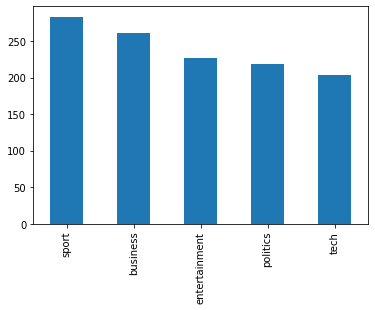

In [ ]:
# find the label and its label counts
label_column = df.columns[-1]
label_counts = y_train.value_counts()
spread = label_counts.std()/label_counts.mean()

# print and bar plot of the label
print(label_column)
print(label_counts)
print(r"spread = {:.4f}".format(spread))
label_counts.plot(kind=r'bar')
plt.show()

Since we have multiple classes, we must use averaging.

Additionally, we have a spread of $13.75\,\%$,
root mean square difference between each value and the mean, normalized by the mean,
which is significant.
Thus, we will use micro-averaging.

In [ ]:
SCORING = r'f1_micro'

In [ ]:
# create a KNN model
clf_knn = KNeighborsClassifier()
# perform the cross validation with neigbors from [1..MAX_NEIGHBORS]
param_grid = dict(n_neighbors=range(1, (1 + MAX_NEIGHBORS)))
knn_grid = GridSearchCV(clf_knn, param_grid, scoring=SCORING)
knn_grid.fit(M_train, y_train)
# display the results
print(knn_grid.best_score_)
print(knn_grid.best_params_)

0.9177701206005414
{'n_neighbors': 4}


### 2.3 Use Logistic Regression to do document classification

In [ ]:
# create a logistic regression model
clf_lr = LogisticRegression(penalty='l2')
# perform the cross validation with neigbors from [1..MAX_COEFF]
param_grid = dict(C=range(1, (1 + MAX_COEFF)))
lr_grid = GridSearchCV(clf_lr, param_grid, scoring=SCORING)
lr_grid.fit(M_train, y_train)
# display the results
print(lr_grid.best_score_)
print(lr_grid.best_params_)

0.9672725994163356
{'C': 7}


Let's compare the $4$NN document classification to the Logistic regression with coefficient $7$.

In [ ]:
# use the best parameters for KNN and logistic regression
clf_knn = KNeighborsClassifier(**knn_grid.best_params_)
clf_lr = LogisticRegression(penalty='l2', **lr_grid.best_params_)

accuracies = []
macro_f1s = []
micro_f1s = []

# for each best classifier
for clf in (clf_knn, clf_lr):
    # retrain
    clf.fit(M_train, y_train)
    # predict from M_test
    y_pred = clf.predict(M_test)
    # calculate the scores
    # and add them to the lists
    accuracies.append(accuracy_score(y_test, y_pred))
    macro_f1s.append(f1_score(y_test, y_pred, average='macro'))
    micro_f1s.append(f1_score(y_test, y_pred, average='micro'))
# next clf

# assemble the scores data frame
scores = pd.DataFrame({r'acc': accuracies,
                       r'macro_f1': macro_f1s, r'micro_f1': micro_f1s},
                     index=[r'knn', r'lr'])
# display the scores
scores

,acc,macro_f1,micro_f1
knn,0.932886,0.931272,0.932886
lr,0.973154,0.973174,0.973154


We find the spread of these scores

In [ ]:
score_spread = pd.DataFrame((scores.std()/scores.mean()).T, columns=['spreads'])
score_spread

,spreads
acc,0.029878
macro_f1,0.031115
micro_f1,0.029878


We can see from the tables above that the scores are very close,
with a spread of about $0.02988$ for accuracy,
$0.03112$ for the macro-averaged $F_1$ score,
$0.02988$ for the micro-averaged $F_1$ score.
However, the linear regression with coefficient $7$ wins out
having both higher accuracy and higher $F_1$ scores.

### 2.4 Use K-means to do document clustering and find the 10 most representative words in each cluster. 

In [ ]:
# combine the training and test data for clustering
M = vstack((M_train, M_test), format='csr')

**Reminder**: partition this dataset into 5 clusters.

In [ ]:
# train the K-means model
# we are told to use 5 clusters.
cluster = KMeans(n_clusters=5, random_state=SEED).fit(M)

# get the unique labels from the value count
labels = label_counts.index

# for each label by number
for label_no, _ in enumerate(labels):
    ii_label = (cluster.labels_ == label_no)
    # print the multiplicity of matched labels
    print(ii_label.sum())
# next label_no

334
232
141
539
244
